In [11]:
import pandas as pd
import numpy as np
import matlab.engine
import os
import sys
import matplotlib.pyplot as plt

In [2]:
eng = matlab.engine.start_matlab()
s = eng.genpath("C:\\Users\\rodrigo\\Documents\\MRS\\Gannet")
eng.addpath(s, nargout=0)

In [30]:
files_base_folder = "C:/Users/rodrigo/Documents/MRS/BIG_GABA"
file_info = {"file_key":f"g7_s10","filename":f"{files_base_folder}/G7_MP/S10/S10_GABA_68.7"}
ranges = [(1,10,False),(1,20,False),(1,30,False),(1,40,False),(1,50,False),(1,60,False),(1,70,False),
          (1,80,True),(1,90,False),(1,100,False),(1,110,False),(1,120,False),(1,130,False),(1,140,False),
          (1,150,False),(1,160,True),(1,170,False),(1,180,False),(1,190,False),(1,200,False),(1,210,False),
          (1,220,False),(1,230,False),(1,240,True),(1,250,False),(1,260,False),(1,270,False),(1,280,False),
          (1,290,False),(1,300,False),(1,310,False),(1,320,True)]


In [31]:
saved_spectra = {}
transient_count_list=[]
snr_list=[]
has_ppm=False
ppm=None
for i_range in ranges:
    mrs_struct = eng.GannetLoad4xAccNoGraphRange(i_range[0],i_range[1],[file_info['filename']])
    if i_range[2]:
        if not has_ppm==None:
            ppm = np.array(mrs_struct["spec"]["freq"]).flatten()
            has_ppm=True
        saved_spectra[str(i_range[1])]=np.array(mrs_struct["spec"]["vox1"]["GABAGlx"]["diff"]).flatten()
        print(saved_spectra[str(i_range[1])].shape)
    snr = eng.GannetFitNoGraph(mrs_struct)["out"]["vox1"]["GABA"]["SNR"]

    transient_count_list.append(i_range[1])
    snr_list.append(snr)

    del mrs_struct

(32768,)
(32768,)
(32768,)
(32768,)


c:\Users\rodrigo\anaconda3\envs\thesis\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


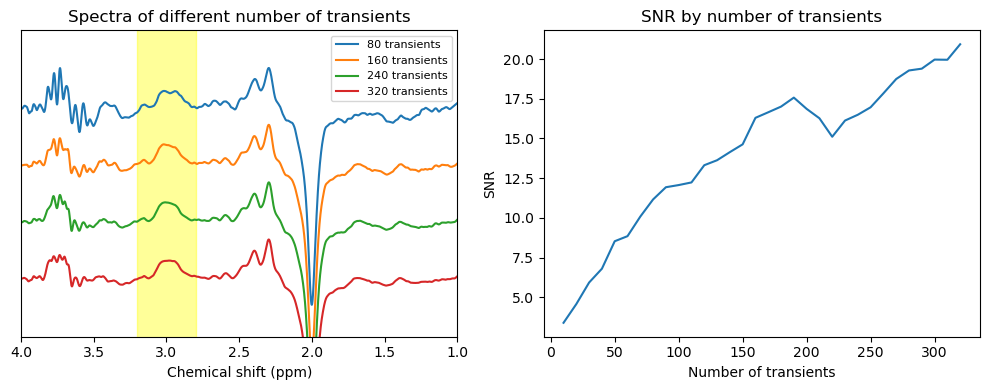

In [40]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

offset=0.005



for i,key in enumerate(saved_spectra):
    ax[0].plot(ppm,saved_spectra[key]-i*offset,label=f"{key} transients")

ax[0].set_xlim(1,4)
ax[0].set_ylim(-0.02,0.007)
ax[0].invert_xaxis()
ax[0].legend(fontsize=8)
ax[0].set_yticks([])
ax[0].set_xlabel("Chemical shift (ppm)")
ax[0].fill_between([2.8,3.2],-1,1,color="yellow",alpha=0.4)


ax[1].plot(transient_count_list,snr_list)
ax[1].set_ylabel("SNR")
ax[1].set_xlabel("Number of transients")

ax[0].set_title("Spectra of different number of transients")
ax[1].set_title("SNR by number of transients")

plt.tight_layout()
plt.show()

In [9]:
saved_spectra.keys()

dict_keys(['10'])